In [1]:
import pandas as pd

In [25]:
data = pd.read_excel('../Datasets/titanic.xls')

In [26]:
data.shape

(1309, 14)

In [27]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [28]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [29]:
data = data[['pclass','survived','sex','age']]

In [30]:
data.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [31]:
data.dropna(inplace=True,axis=0)

In [35]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [33]:
data.shape

(1046, 4)

<Axes: xlabel='pclass'>

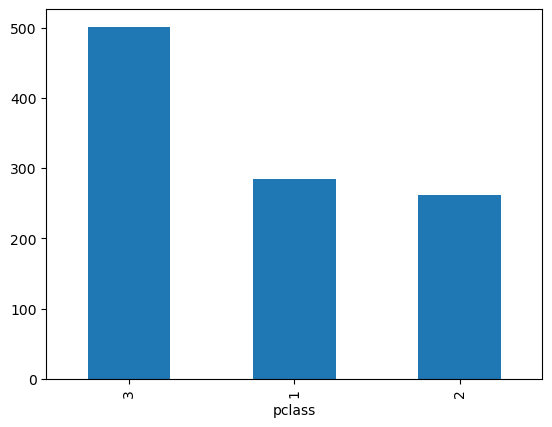

In [36]:
data['pclass'].value_counts().plot.bar()

<Axes: >

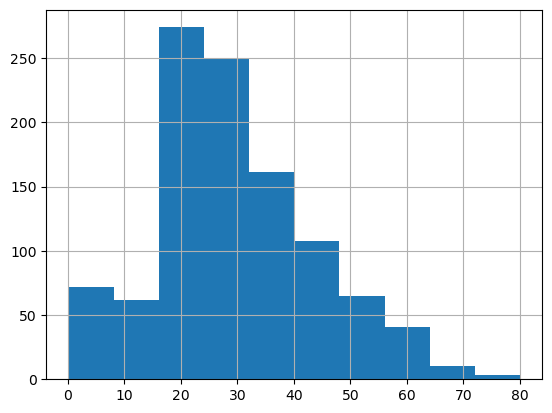

In [37]:
data['age'].hist()

In [39]:
data.groupby(['sex','pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

## Series

In [42]:
data = data.set_index('pclass')
data['age']

pclass
1    29.0000
1     0.9167
1     2.0000
1    30.0000
1    25.0000
      ...   
3    45.5000
3    14.5000
3    26.5000
3    27.0000
3    29.0000
Name: age, Length: 1046, dtype: float64

## Exercices catégorisation des âges

In [44]:
data.loc[data['age'] < 20] = 0

# Remplacer les valeurs où l'âge est entre 20 inclusivement et moins de 30 par 1
data.loc[(data['age'] >= 20) & (data['age'] < 30)] = 1

# Remplacer les valeurs où l'âge est entre 30 inclusivement et moins de 40 par 2
data.loc[(data['age'] >= 30) & (data['age'] < 40)] = 2

# Remplacer les valeurs où l'âge est supérieur ou égal à 40 par 3
data.loc[data['age'] >= 40] = 3

In [45]:
data['age'].value_counts()

age
1.0    344
3.0    245
2.0    232
0.0    225
Name: count, dtype: int64